In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_VJC_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,117964,118955,115981,118955,1125320
1,2019-03-04,119451,120145,118658,119847,990660
2,2019-03-05,119550,119649,118459,118955,1074790
3,2019-03-06,118955,119946,118955,119946,939310
4,2019-03-07,119946,120541,119847,120343,1014890
...,...,...,...,...,...,...
1247,2024-02-23,103800,104400,103400,103800,670800
1248,2024-02-26,103900,104900,103900,104500,605600
1249,2024-02-27,104800,104800,103500,103500,647800
1250,2024-02-28,103500,104700,103300,103400,638600


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.9 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(time_step, 1)))
model_rnn.add(Dropout(0.5))  
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5774 - val_loss: 0.0181
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1545 - val_loss: 0.0033
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1013 - val_loss: 0.0011
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0601 - val_loss: 4.5186e-04
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0471 - val_loss: 0.0023
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0598 - val_loss: 4.4205e-04
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0355 - val_loss: 3.7705e-04
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0323 - val_loss: 2.7795e-04
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0263 - val_loss: 0.0013
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0248 - val_loss: 2.1854e-04
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - val_loss: 2.4845e-04
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 678.6786679900626
MAPE: 0.5017500629718237 %
MSLE: 4.215046830322141e-05


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.0307971  0.05797101 0.05978261 0.0634058  0.06884058 0.07065217
 0.18115942 0.1576087  0.16485507 0.20108696 0.20471014 0.20652174
 0.17572464 0.17753623 0.16304348 0.10869565 0.10869565 0.07608696
 0.0942029  0.19202899 0.20108696 0.23007246 0.24456522 0.22101449
 0.34782609 0.26449275 0.27536232 0.25724638 0.25362319 0.26992754
 0.26630435 0.21195652 0.21557971 0.23188406 0.26086957 0.20289855
 0.22644928 0.22101449 0.23007246 0.23550725 0.14855072 0.21014493
 0.2173913  0.20471014 0.2173913  0.21557971 0.1884058  0.1884058
 0.19384058 0.20289855 0.20833333 0.16666667 0.20289855 0.19021739
 0.19021739 0.20833333 0.22463768 0.25362319 0.25724638 0.25543478
 0.25724638 0.25724638 0.23913043 0.25181159 0.25362319 0.25
 0.23188406 0.23007246 0.21557971 0.2173913  0.20833333 0.20652174
 0.21014493 0.19565217 0.19021739 0.20289855 0.21376812 0.20289855
 0.19746377 0.20108696 0.21557971 0.2173913  0.21376812 0.19565217
 0.21195652 0.19927536 0.20833333 0.19384058 0.20833333 0

11 day output [[0.14765628]]
12 day input [0.17572464 0.17753623 0.16304348 0.10869565 0.10869565 0.07608696
 0.0942029  0.19202899 0.20108696 0.23007246 0.24456522 0.22101449
 0.34782609 0.26449275 0.27536232 0.25724638 0.25362319 0.26992754
 0.26630435 0.21195652 0.21557971 0.23188406 0.26086957 0.20289855
 0.22644928 0.22101449 0.23007246 0.23550725 0.14855072 0.21014493
 0.2173913  0.20471014 0.2173913  0.21557971 0.1884058  0.1884058
 0.19384058 0.20289855 0.20833333 0.16666667 0.20289855 0.19021739
 0.19021739 0.20833333 0.22463768 0.25362319 0.25724638 0.25543478
 0.25724638 0.25724638 0.23913043 0.25181159 0.25362319 0.25
 0.23188406 0.23007246 0.21557971 0.2173913  0.20833333 0.20652174
 0.21014493 0.19565217 0.19021739 0.20289855 0.21376812 0.20289855
 0.19746377 0.20108696 0.21557971 0.2173913  0.21376812 0.19565217
 0.21195652 0.19927536 0.20833333 0.19384058 0.20833333 0.19384058
 0.20833333 0.20652174 0.19021739 0.17028986 0.17753623 0.18115942
 0.19384058 0.17572464 0.17

21 day output [[0.12964354]]
22 day input [0.24456522 0.22101449 0.34782609 0.26449275 0.27536232 0.25724638
 0.25362319 0.26992754 0.26630435 0.21195652 0.21557971 0.23188406
 0.26086957 0.20289855 0.22644928 0.22101449 0.23007246 0.23550725
 0.14855072 0.21014493 0.2173913  0.20471014 0.2173913  0.21557971
 0.1884058  0.1884058  0.19384058 0.20289855 0.20833333 0.16666667
 0.20289855 0.19021739 0.19021739 0.20833333 0.22463768 0.25362319
 0.25724638 0.25543478 0.25724638 0.25724638 0.23913043 0.25181159
 0.25362319 0.25       0.23188406 0.23007246 0.21557971 0.2173913
 0.20833333 0.20652174 0.21014493 0.19565217 0.19021739 0.20289855
 0.21376812 0.20289855 0.19746377 0.20108696 0.21557971 0.2173913
 0.21376812 0.19565217 0.21195652 0.19927536 0.20833333 0.19384058
 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739 0.17028986
 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304 0.16847826
 0.16972014 0.16719644 0.16396205 0.16165471 0.16128311 0.15981016
 0.15814507 0.15604681

31 day output [[0.11157282]]
32 day input [0.21557971 0.23188406 0.26086957 0.20289855 0.22644928 0.22101449
 0.23007246 0.23550725 0.14855072 0.21014493 0.2173913  0.20471014
 0.2173913  0.21557971 0.1884058  0.1884058  0.19384058 0.20289855
 0.20833333 0.16666667 0.20289855 0.19021739 0.19021739 0.20833333
 0.22463768 0.25362319 0.25724638 0.25543478 0.25724638 0.25724638
 0.23913043 0.25181159 0.25362319 0.25       0.23188406 0.23007246
 0.21557971 0.2173913  0.20833333 0.20652174 0.21014493 0.19565217
 0.19021739 0.20289855 0.21376812 0.20289855 0.19746377 0.20108696
 0.21557971 0.2173913  0.21376812 0.19565217 0.21195652 0.19927536
 0.20833333 0.19384058 0.20833333 0.19384058 0.20833333 0.20652174
 0.19021739 0.17028986 0.17753623 0.18115942 0.19384058 0.17572464
 0.17391304 0.16847826 0.16972014 0.16719644 0.16396205 0.16165471
 0.16128311 0.15981016 0.15814507 0.15604681 0.15509893 0.15160301
 0.14970136 0.14765628 0.14705934 0.14619224 0.14277942 0.14126262
 0.13921082 0.139112

41 day output [[0.09523354]]
42 day input [0.2173913  0.20471014 0.2173913  0.21557971 0.1884058  0.1884058
 0.19384058 0.20289855 0.20833333 0.16666667 0.20289855 0.19021739
 0.19021739 0.20833333 0.22463768 0.25362319 0.25724638 0.25543478
 0.25724638 0.25724638 0.23913043 0.25181159 0.25362319 0.25
 0.23188406 0.23007246 0.21557971 0.2173913  0.20833333 0.20652174
 0.21014493 0.19565217 0.19021739 0.20289855 0.21376812 0.20289855
 0.19746377 0.20108696 0.21557971 0.2173913  0.21376812 0.19565217
 0.21195652 0.19927536 0.20833333 0.19384058 0.20833333 0.19384058
 0.20833333 0.20652174 0.19021739 0.17028986 0.17753623 0.18115942
 0.19384058 0.17572464 0.17391304 0.16847826 0.16972014 0.16719644
 0.16396205 0.16165471 0.16128311 0.15981016 0.15814507 0.15604681
 0.15509893 0.15160301 0.14970136 0.14765628 0.14705934 0.14619224
 0.14277942 0.14126262 0.13921082 0.13911235 0.13766742 0.13417926
 0.13310425 0.12964354 0.13017227 0.12745169 0.12547898 0.12264957
 0.12158151 0.11973473 0.11

51 day output [[0.07825263]]
52 day input [0.20289855 0.19021739 0.19021739 0.20833333 0.22463768 0.25362319
 0.25724638 0.25543478 0.25724638 0.25724638 0.23913043 0.25181159
 0.25362319 0.25       0.23188406 0.23007246 0.21557971 0.2173913
 0.20833333 0.20652174 0.21014493 0.19565217 0.19021739 0.20289855
 0.21376812 0.20289855 0.19746377 0.20108696 0.21557971 0.2173913
 0.21376812 0.19565217 0.21195652 0.19927536 0.20833333 0.19384058
 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739 0.17028986
 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304 0.16847826
 0.16972014 0.16719644 0.16396205 0.16165471 0.16128311 0.15981016
 0.15814507 0.15604681 0.15509893 0.15160301 0.14970136 0.14765628
 0.14705934 0.14619224 0.14277942 0.14126262 0.13921082 0.13911235
 0.13766742 0.13417926 0.13310425 0.12964354 0.13017227 0.12745169
 0.12547898 0.12264957 0.12158151 0.11973473 0.11784304 0.11466797
 0.11365094 0.11157282 0.11160555 0.10864759 0.10634713 0.10478061
 0.1036355  0.10237938

61 day output [[0.06199793]]
62 day input [0.23913043 0.25181159 0.25362319 0.25       0.23188406 0.23007246
 0.21557971 0.2173913  0.20833333 0.20652174 0.21014493 0.19565217
 0.19021739 0.20289855 0.21376812 0.20289855 0.19746377 0.20108696
 0.21557971 0.2173913  0.21376812 0.19565217 0.21195652 0.19927536
 0.20833333 0.19384058 0.20833333 0.19384058 0.20833333 0.20652174
 0.19021739 0.17028986 0.17753623 0.18115942 0.19384058 0.17572464
 0.17391304 0.16847826 0.16972014 0.16719644 0.16396205 0.16165471
 0.16128311 0.15981016 0.15814507 0.15604681 0.15509893 0.15160301
 0.14970136 0.14765628 0.14705934 0.14619224 0.14277942 0.14126262
 0.13921082 0.13911235 0.13766742 0.13417926 0.13310425 0.12964354
 0.13017227 0.12745169 0.12547898 0.12264957 0.12158151 0.11973473
 0.11784304 0.11466797 0.11365094 0.11157282 0.11160555 0.10864759
 0.10634713 0.10478061 0.1036355  0.10237938 0.10051101 0.0991208
 0.09706406 0.09523354 0.09430116 0.09271345 0.09042537 0.08859013
 0.08704415 0.0858605

71 day output [[0.04635414]]
72 day input [0.21014493 0.19565217 0.19021739 0.20289855 0.21376812 0.20289855
 0.19746377 0.20108696 0.21557971 0.2173913  0.21376812 0.19565217
 0.21195652 0.19927536 0.20833333 0.19384058 0.20833333 0.19384058
 0.20833333 0.20652174 0.19021739 0.17028986 0.17753623 0.18115942
 0.19384058 0.17572464 0.17391304 0.16847826 0.16972014 0.16719644
 0.16396205 0.16165471 0.16128311 0.15981016 0.15814507 0.15604681
 0.15509893 0.15160301 0.14970136 0.14765628 0.14705934 0.14619224
 0.14277942 0.14126262 0.13921082 0.13911235 0.13766742 0.13417926
 0.13310425 0.12964354 0.13017227 0.12745169 0.12547898 0.12264957
 0.12158151 0.11973473 0.11784304 0.11466797 0.11365094 0.11157282
 0.11160555 0.10864759 0.10634713 0.10478061 0.1036355  0.10237938
 0.10051101 0.0991208  0.09706406 0.09523354 0.09430116 0.09271345
 0.09042537 0.08859013 0.08704415 0.08586051 0.08408633 0.08158252
 0.08007167 0.07825263 0.07721852 0.07526666 0.07350862 0.07163003
 0.07029828 0.068740

81 day output [[0.03141454]]
82 day input [0.21376812 0.19565217 0.21195652 0.19927536 0.20833333 0.19384058
 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739 0.17028986
 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304 0.16847826
 0.16972014 0.16719644 0.16396205 0.16165471 0.16128311 0.15981016
 0.15814507 0.15604681 0.15509893 0.15160301 0.14970136 0.14765628
 0.14705934 0.14619224 0.14277942 0.14126262 0.13921082 0.13911235
 0.13766742 0.13417926 0.13310425 0.12964354 0.13017227 0.12745169
 0.12547898 0.12264957 0.12158151 0.11973473 0.11784304 0.11466797
 0.11365094 0.11157282 0.11160555 0.10864759 0.10634713 0.10478061
 0.1036355  0.10237938 0.10051101 0.0991208  0.09706406 0.09523354
 0.09430116 0.09271345 0.09042537 0.08859013 0.08704415 0.08586051
 0.08408633 0.08158252 0.08007167 0.07825263 0.07721852 0.07526666
 0.07350862 0.07163003 0.07029828 0.06874014 0.06721425 0.06518998
 0.06349238 0.06199793 0.06084093 0.05896147 0.05733351 0.05548859
 0.05416283 0.052798

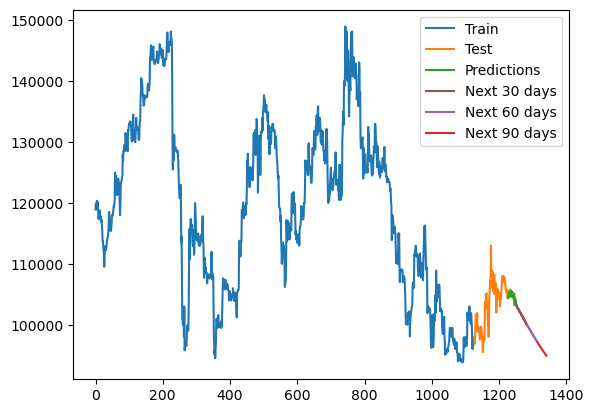

In [12]:
#12. Draw the plot
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_VJC_91.png")
plt.show()